In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [35]:
df = pd.read_csv('tablewithregions.csv')
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [36]:
df.head()

,Police_Force_Name,Year,Quarter,Detailed_Offence_Description,Offence_Group,Offence_Subgroup,Number_of_Arrests,Arrests_Ranked,Level_of_Lockdown,Region
0,Avon and Somerset,2020,1,Homicide,Violence against the person,Homicide,2,(-0.001. 20.0],High,South West
1,Avon and Somerset,2020,1,Assault without injury on a constable,Violence against the person,Violence without injury,8,(-0.001. 20.0],High,South West
2,Avon and Somerset,2020,1,Assault without injury,Violence against the person,Violence without injury,89,(80.0. 100.0],High,South West
3,Avon and Somerset,2020,1,Racially or religiously aggravated assault wit...,Violence against the person,Violence without injury,1,(-0.001. 20.0],High,South West
4,Avon and Somerset,2020,1,Modern slavery,Violence against the person,Violence without injury,2,(-0.001. 20.0],High,South West


In [37]:
df.Year = pd.to_datetime(df['Year'], format='%Y')

In [38]:
df.dtypes

Police_Force_Name                       object
Year                            datetime64[ns]
Quarter                                  int64
Detailed_Offence_Description            object
Offence_Group                           object
Offence_Subgroup                        object
Number_of_Arrests                        int64
Arrests_Ranked                          object
Level_of_Lockdown                       object
Region                                  object
dtype: object

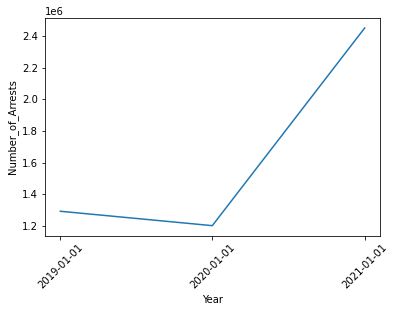

In [79]:
sns.lineplot(data = df, x='Year', y='Number_of_Arrests',ci=None,estimator=sum)
plt.xticks(['2019','2020','2021'])
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

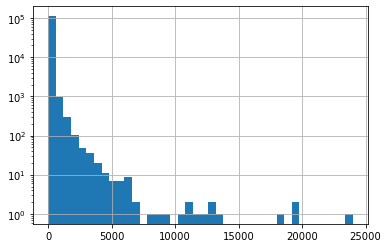

In [40]:
df.Number_of_Arrests.hist(log=True,bins=40)

<AxesSubplot:xlabel='Year', ylabel='Number_of_Arrests'>

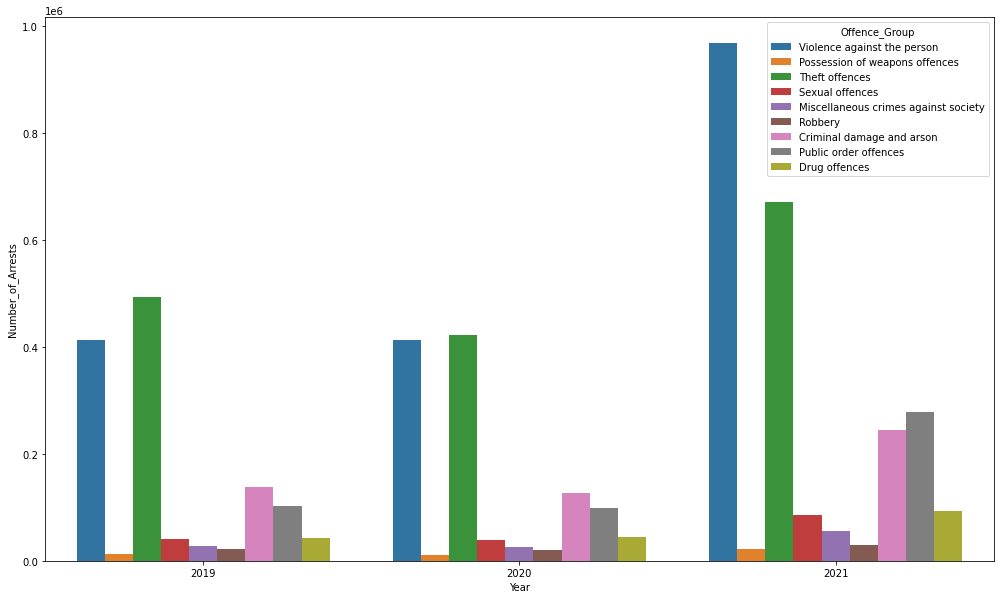

In [80]:
plt.figure(figsize=(17,10))
sns.barplot(data=df,x='Year',y='Number_of_Arrests',hue='Offence_Group',ci=None,order=['2019','2020','2021'],estimator=sum)

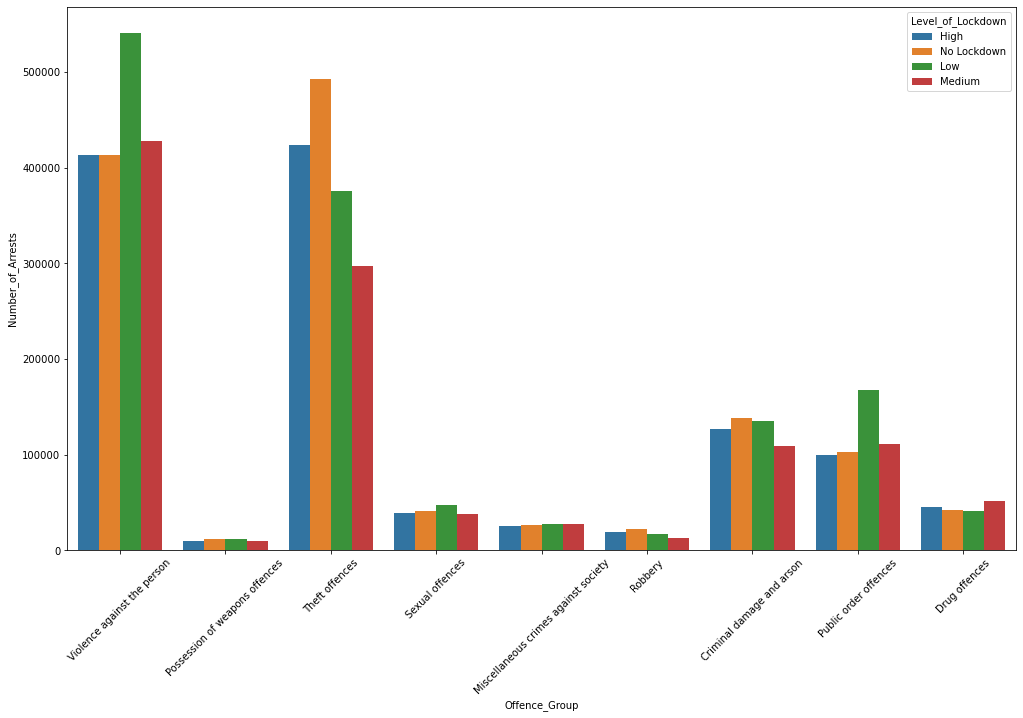

In [69]:
plt.figure(figsize=(17,10))
sns.barplot(data=df,x='Offence_Group',y='Number_of_Arrests',hue='Level_of_Lockdown',ci=None,estimator=sum)
plt.xticks(rotation=45)
plt.show()

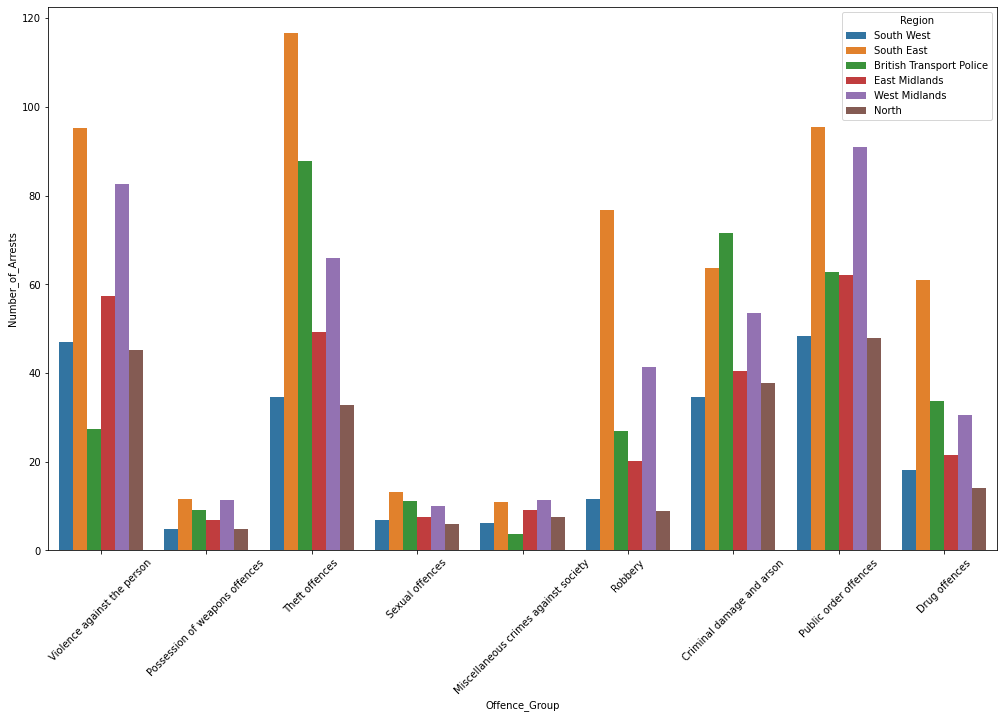

In [72]:
plt.figure(figsize=(17,10))
sns.barplot(data=df,x='Offence_Group',y='Number_of_Arrests',hue='Region',ci=None)
plt.xticks(rotation=45)
plt.show()

In [76]:
tabs = pd.crosstab(df.Arrests_Ranked,df.Level_of_Lockdown)
tabs

Level_of_Lockdown,High,Low,Medium,No Lockdown
Arrests_Ranked,,,,
(-0.001. 20.0],22192,20616,22645,22582
(100.0. 120.0],281,329,256,270
(1000.0. 1020.0],3,8,6,6
(1020.0. 1040.0],6,7,2,8
(1040.0. 1060.0],9,5,8,3
...,...,...,...,...
(920.0. 940.0],7,7,13,9
(940.0. 960.0],6,2,8,3
(960.0. 980.0],11,9,5,5


In [77]:
chi2_contingency(tabs)

(462.7082512858197,
 4.5751129890530356e-09,
 300,
 array([[2.19084495e+04, 2.13324043e+04, 2.23635095e+04, 2.24306367e+04],
        [2.82705726e+02, 2.75272463e+02, 2.88577802e+02, 2.89444009e+02],
        [5.72379551e+00, 5.57329810e+00, 5.84268438e+00, 5.86022201e+00],
        [5.72379551e+00, 5.57329810e+00, 5.84268438e+00, 5.86022201e+00],
        [6.22151685e+00, 6.05793272e+00, 6.35074389e+00, 6.36980654e+00],
        [6.96809888e+00, 6.78488465e+00, 7.11283315e+00, 7.13418332e+00],
        [3.98177079e+00, 3.87707694e+00, 4.06447609e+00, 4.07667618e+00],
        [5.47493483e+00, 5.33098080e+00, 5.58865462e+00, 5.60542975e+00],
        [5.47493483e+00, 5.33098080e+00, 5.58865462e+00, 5.60542975e+00],
        [5.47493483e+00, 5.33098080e+00, 5.58865462e+00, 5.60542975e+00],
        [4.47949214e+00, 4.36171156e+00, 4.57253560e+00, 4.58626071e+00],
        [2.73746742e+00, 2.66549040e+00, 2.79432731e+00, 2.80271488e+00],
        [2.09291827e+02, 2.03788857e+02, 2.13639024e+02, 2.14

In [78]:
tabs2 = pd.crosstab(df.Arrests_Ranked,df.Year)
tabs2

Year,2019-01-01,2020-01-01,2021-01-01
Arrests_Ranked,,,
(-0.001. 20.0],22582,22192,43261
(100.0. 120.0],270,281,585
(1000.0. 1020.0],6,3,14
(1020.0. 1040.0],8,6,9
(1040.0. 1060.0],3,9,13
...,...,...,...
(920.0. 940.0],9,7,20
(940.0. 960.0],3,6,10
(960.0. 980.0],5,11,14
